# Convert OpenGWAS Project vcf file to PLINK GWAS formats  

FTD ieu-b-43 GWAS data downloaded from OpenGWAS Project:  

https://gwas.mrcieu.ac.uk/datasets/ieu-b-43/


<div>
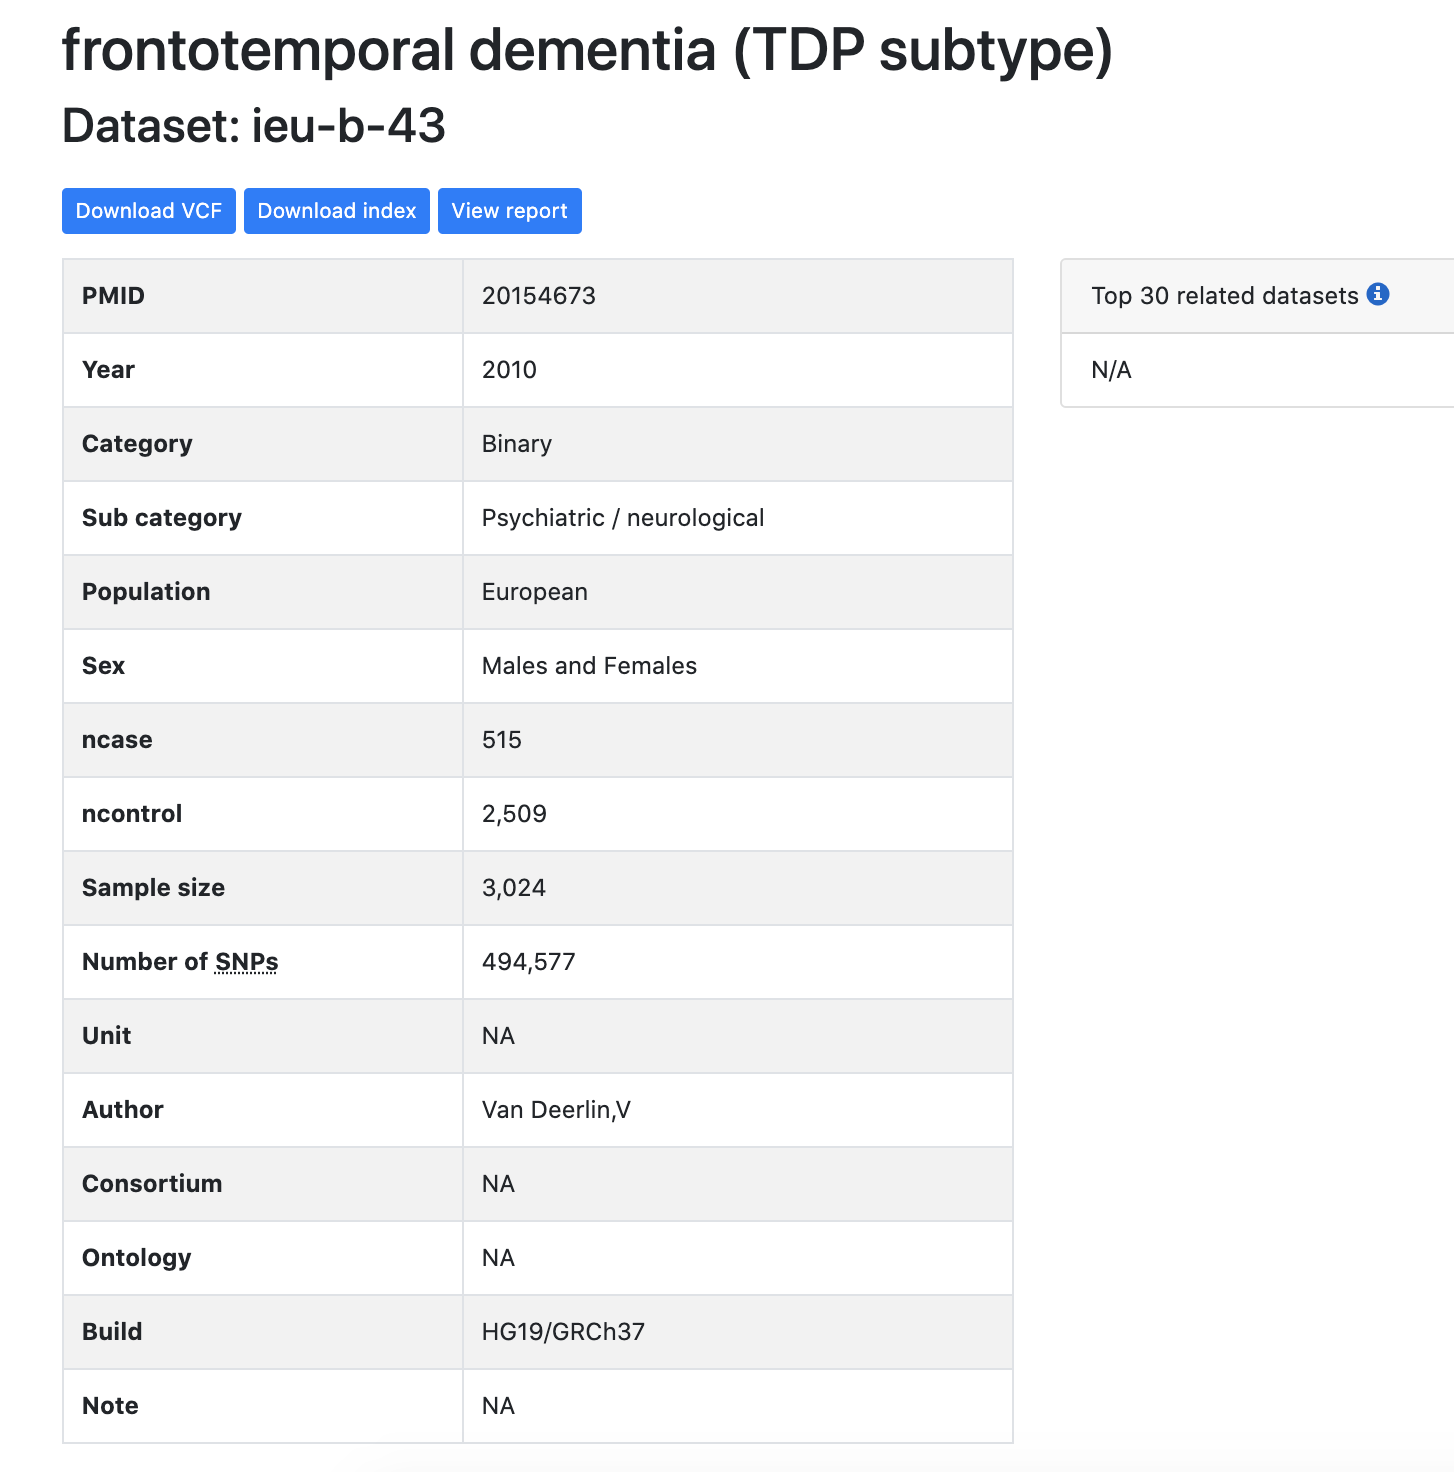
</div>  


#### Imports & Setup

In [1]:
import pandas as pd
import io

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#### File I/O variables

In [2]:
## input file
vcf_file = '../data/gwas_vcf/ieu-b-43.vcf'


## output files
assoc_out = '../data/gwas_plink/FTD_ieu-b-43.assoc'
logistic_out = '../data/gwas_plink/FTD_ieu-b-43.assoc.logistic'
vcf_out = '../data/gwas_plink/FTD_ieu-b-43.vcf.extracted.gwas'

### Read in VCF file  

In [3]:
!grep "##FORMAT="  {vcf_file}

##FORMAT=<ID=ES,Number=A,Type=Float,Description="Effect size estimate relative to the alternative allele">
##FORMAT=<ID=SE,Number=A,Type=Float,Description="Standard error of effect size estimate">
##FORMAT=<ID=LP,Number=A,Type=Float,Description="-log10 p-value for effect estimate">
##FORMAT=<ID=AF,Number=A,Type=Float,Description="Alternate allele frequency in the association study">
##FORMAT=<ID=SS,Number=A,Type=Float,Description="Sample size used to estimate genetic effect">
##FORMAT=<ID=EZ,Number=A,Type=Float,Description="Z-score provided if it was used to derive the EFFECT and SE fields">
##FORMAT=<ID=SI,Number=A,Type=Float,Description="Accuracy score of summary data imputation">
##FORMAT=<ID=NC,Number=A,Type=Float,Description="Number of cases used to estimate genetic effect">
##FORMAT=<ID=ID,Number=1,Type=String,Description="Study variant identifier">


In [4]:
!awk 'NR >= 110 && NR <= 115'  {vcf_file}

1	1005806	rs3934834	C	T	.	PASS	AF=0.148488	ES:SE:LP:AF:SS:NC:ID	0.0459289:0.0955402:0.200177:0.148488:3024:515:rs3934834
1	1018704	rs9442372	A	G	.	PASS	AF=0.565981	ES:SE:LP:AF:SS:NC:ID	0.110373:0.0694047:0.951558:0.565981:3024:515:rs9442372
1	1030565	rs6687776	C	T	.	PASS	AF=0.157866	ES:SE:LP:AF:SS:NC:ID	0.19721:0.089995:1.54622:0.157866:3024:515:rs6687776
1	1031540	rs776599533	A	G	.	PASS	AF=0.726524	ES:SE:LP:AF:SS:NC:ID	0.0573114:0.0776181:0.336959:0.726524:3024:515:rs776599533
1	1048955	rs4970405	A	G	.	PASS	AF=0.102731	ES:SE:LP:AF:SS:NC:ID	0.13715:0.108973:0.681519:0.102731:3024:515:rs4970405
1	1049950	rs12726255	A	G	.	PASS	AF=0.139536	ES:SE:LP:AF:SS:NC:ID	0.152721:0.0951169:0.964971:0.139536:3024:515:rs12726255


#### read vcf file using Python functions

In [5]:
def read_vcf(path):
    with open(path, 'r') as f:
        lines = [l for l in f if not l.startswith('##')]
    return pd.read_csv(
        io.StringIO(''.join(lines)),
        dtype={'#CHROM': str, 'POS': int, 'ID': str, 'REF': str, 'ALT': str,
               'QUAL': str, 'FILTER': str, 'INFO': str},
        sep='\t'
    ).rename(columns={'#CHROM': 'CHROM'})


def read_header(path):
    with open(path, 'r') as f:
        header = [l for l in f if l.startswith('##')]
    return header

In [6]:
vcf_in = read_vcf(vcf_file)

vcf_in.shape
vcf_in.head()

(399503, 10)

CHROM      POS           ID REF ALT QUAL FILTER         INFO  \
0     1   768448   rs12562034   G   A    .   PASS  AF=0.105726   
1     1  1005806    rs3934834   C   T    .   PASS  AF=0.148488   
2     1  1018704    rs9442372   A   G    .   PASS  AF=0.565981   
3     1  1030565    rs6687776   C   T    .   PASS  AF=0.157866   
4     1  1031540  rs776599533   A   G    .   PASS  AF=0.726524   

                 FORMAT                                           ieu-b-43  
0  ES:SE:LP:AF:SS:NC:ID  0.0256677:0.110171:0.0884163:0.105726:3024:515...  
1  ES:SE:LP:AF:SS:NC:ID  0.0459289:0.0955402:0.200177:0.148488:3024:515...  
2  ES:SE:LP:AF:SS:NC:ID  0.110373:0.0694047:0.951558:0.565981:3024:515:...  
3  ES:SE:LP:AF:SS:NC:ID  0.19721:0.089995:1.54622:0.157866:3024:515:rs6...  
4  ES:SE:LP:AF:SS:NC:ID  0.0573114:0.0776181:0.336959:0.726524:3024:515...

In [7]:
vcf_in['CHROM'].unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22'],
      dtype=object)

In [8]:
cols_input = vcf_in.columns.to_list()
cols_input

['CHROM',
 'POS',
 'ID',
 'REF',
 'ALT',
 'QUAL',
 'FILTER',
 'INFO',
 'FORMAT',
 'ieu-b-43']

In [9]:
cols_input[-1]

'ieu-b-43'

In [10]:
vcf_in[vcf_in['INFO']=='.']

Empty DataFrame
Columns: [CHROM, POS, ID, REF, ALT, QUAL, FILTER, INFO, FORMAT, ieu-b-43]
Index: []

In [11]:
vcf_in.dtypes

CHROM       object
POS          int64
ID          object
REF         object
ALT         object
QUAL        object
FILTER      object
INFO        object
FORMAT      object
ieu-b-43    object
dtype: object

#### Cast CHROM column to int

In [12]:
vcf_in['CHROM'] = vcf_in['CHROM'].astype(int)

vcf_in.dtypes

CHROM        int64
POS          int64
ID          object
REF         object
ALT         object
QUAL        object
FILTER      object
INFO        object
FORMAT      object
ieu-b-43    object
dtype: object

### Extract vcf format fields --> separate columns

Extract format field names from 'FORMAT' column

In [13]:
_fmt_str = vcf_in.loc[0, 'FORMAT']
_fmt_str

_fmt_list = _fmt_str.split(':')
_fmt_list

'ES:SE:LP:AF:SS:NC:ID'

['ES', 'SE', 'LP', 'AF', 'SS', 'NC', 'ID']

In [14]:
_format_vals = vcf_in['FORMAT'].unique().tolist()

_format_vals

['ES:SE:LP:AF:SS:NC:ID']

#### add cols before splitting FORMAT column

In [15]:
vcf_in['idx'] = vcf_in.index.copy()
# vcf_in['CHR'] = vcf_in['CHROM'].copy()
# vcf_in['BP'] = vcf_in['POS'].copy()
# vcf_in['A1'] = vcf_in['ALT'].copy()
# vcf_in['A2'] = vcf_in['REF'].copy()

vcf_in.dtypes

CHROM        int64
POS          int64
ID          object
REF         object
ALT         object
QUAL        object
FILTER      object
INFO        object
FORMAT      object
ieu-b-43    object
idx          int64
dtype: object

#### rename ID column befoer splitting FORMAT column

In [16]:
vcf_in = vcf_in.rename(columns={'ID':'rsID'})

vcf_in.head(3)
vcf_in.columns

CHROM      POS        rsID REF ALT QUAL FILTER         INFO  \
0      1   768448  rs12562034   G   A    .   PASS  AF=0.105726   
1      1  1005806   rs3934834   C   T    .   PASS  AF=0.148488   
2      1  1018704   rs9442372   A   G    .   PASS  AF=0.565981   

                 FORMAT                                           ieu-b-43  \
0  ES:SE:LP:AF:SS:NC:ID  0.0256677:0.110171:0.0884163:0.105726:3024:515...   
1  ES:SE:LP:AF:SS:NC:ID  0.0459289:0.0955402:0.200177:0.148488:3024:515...   
2  ES:SE:LP:AF:SS:NC:ID  0.110373:0.0694047:0.951558:0.565981:3024:515:...   

   idx  
0    0  
1    1  
2    2

Index(['CHROM', 'POS', 'rsID', 'REF', 'ALT', 'QUAL', 'FILTER', 'INFO',
       'FORMAT', 'ieu-b-43', 'idx'],
      dtype='object')

#### IF multiple FORMAT values: Split DF by FORMAT colum

In [17]:
# _vcf_in_a = vcf_in[vcf_in['FORMAT']== _format_vals[0]].copy()

# _vcf_in_b = vcf_in[vcf_in['FORMAT']== _format_vals[1]].copy()

# vcf_in.shape
# _vcf_in_a.shape
# _vcf_in_b.shape

### Split sample column --> format fields

In [18]:
vcf_in[_fmt_list] = vcf_in[cols_input[-1]].str.split(':', expand=True)

if 'idx' in vcf_in.columns:
    vcf_in.drop(columns=['idx'], inplace=True)

vcf_in.head()

vcf_in2 = vcf_in
vcf_in2.dtypes
vcf_in2.columns
vcf_in2.shape



CHROM      POS         rsID REF ALT QUAL FILTER         INFO  \
0      1   768448   rs12562034   G   A    .   PASS  AF=0.105726   
1      1  1005806    rs3934834   C   T    .   PASS  AF=0.148488   
2      1  1018704    rs9442372   A   G    .   PASS  AF=0.565981   
3      1  1030565    rs6687776   C   T    .   PASS  AF=0.157866   
4      1  1031540  rs776599533   A   G    .   PASS  AF=0.726524   

                 FORMAT                                           ieu-b-43  \
0  ES:SE:LP:AF:SS:NC:ID  0.0256677:0.110171:0.0884163:0.105726:3024:515...   
1  ES:SE:LP:AF:SS:NC:ID  0.0459289:0.0955402:0.200177:0.148488:3024:515...   
2  ES:SE:LP:AF:SS:NC:ID  0.110373:0.0694047:0.951558:0.565981:3024:515:...   
3  ES:SE:LP:AF:SS:NC:ID  0.19721:0.089995:1.54622:0.157866:3024:515:rs6...   
4  ES:SE:LP:AF:SS:NC:ID  0.0573114:0.0776181:0.336959:0.726524:3024:515...   

          ES         SE         LP        AF    SS   NC           ID  
0  0.0256677   0.110171  0.0884163  0.105726  3024  515   rs12562034  
1  0.0459289  0.0955402   0.200177  0.148488  3024  515    rs3934834  
2   0.110373  0.0694047   0.951558  0.565981  3024  515    rs9442372  
3    0.19721   0.089995    1.54622  0.157866  3024  515    rs6687776  
4  0.0573114  0.0776181   0.336959  0.726524  3024  515  rs776599533

CHROM        int64
POS          int64
rsID        object
REF         object
ALT         object
QUAL        object
FILTER      object
INFO        object
FORMAT      object
ieu-b-43    object
ES          object
SE          object
LP          object
AF          object
SS          object
NC          object
ID          object
dtype: object

Index(['CHROM', 'POS', 'rsID', 'REF', 'ALT', 'QUAL', 'FILTER', 'INFO',
       'FORMAT', 'ieu-b-43', 'ES', 'SE', 'LP', 'AF', 'SS', 'NC', 'ID'],
      dtype='object')

(399503, 17)

In [19]:
# _vcf_in_a[_format_vals[0].split(':')] = _vcf_in_a[cols_input[-1]].str.split(':', expand=True)

# vcf_in.shape
# _vcf_in_a.shape
# _vcf_in_a.head()

In [20]:
# _vcf_in_b[_format_vals[1].split(':')] = _vcf_in_b[cols_input[-1]].str.split(':', expand=True)

# vcf_in.shape
# _vcf_in_b.shape

# vcf_in.head(2)
# _vcf_in_b.head()

# vcf_in.columns
# _vcf_in_b.columns

In [21]:
# vcf_in2 = pd.concat([_vcf_in_a, _vcf_in_b], axis=0)


# vcf_in.shape
# vcf_in2.shape

# vcf_in2.tail(3)

# vcf_in2['AF'] = vcf_in2['AF'].fillna(0.0)

# vcf_in2.tail(3)

# vcf_in2 = vcf_in2.sort_values('idx').reset_index(drop=True).drop(columns=['idx'])

# vcf_in2.tail(3)

# ## delete orig DF
# del vcf_in

In [22]:
vcf_in2 = vcf_in2.rename(columns={'ID':'SNP', 'rsID':'ID'})

vcf_in2.head(3)
vcf_in2.columns

CHROM      POS          ID REF ALT QUAL FILTER         INFO  \
0      1   768448  rs12562034   G   A    .   PASS  AF=0.105726   
1      1  1005806   rs3934834   C   T    .   PASS  AF=0.148488   
2      1  1018704   rs9442372   A   G    .   PASS  AF=0.565981   

                 FORMAT                                           ieu-b-43  \
0  ES:SE:LP:AF:SS:NC:ID  0.0256677:0.110171:0.0884163:0.105726:3024:515...   
1  ES:SE:LP:AF:SS:NC:ID  0.0459289:0.0955402:0.200177:0.148488:3024:515...   
2  ES:SE:LP:AF:SS:NC:ID  0.110373:0.0694047:0.951558:0.565981:3024:515:...   

          ES         SE         LP        AF    SS   NC         SNP  
0  0.0256677   0.110171  0.0884163  0.105726  3024  515  rs12562034  
1  0.0459289  0.0955402   0.200177  0.148488  3024  515   rs3934834  
2   0.110373  0.0694047   0.951558  0.565981  3024  515   rs9442372

Index(['CHROM', 'POS', 'ID', 'REF', 'ALT', 'QUAL', 'FILTER', 'INFO', 'FORMAT',
       'ieu-b-43', 'ES', 'SE', 'LP', 'AF', 'SS', 'NC', 'SNP'],
      dtype='object')

#### cast extracted columns

In [23]:
cols_format = [c for c in vcf_in2.columns if c not in cols_input]

cols_format

['ES', 'SE', 'LP', 'AF', 'SS', 'NC', 'SNP']

In [24]:
vcf_in2.dtypes

CHROM        int64
POS          int64
ID          object
REF         object
ALT         object
QUAL        object
FILTER      object
INFO        object
FORMAT      object
ieu-b-43    object
ES          object
SE          object
LP          object
AF          object
SS          object
NC          object
SNP         object
dtype: object

In [25]:
for c in cols_format:
    if c not in ['ID', 'SNP']:
        print(c)
        vcf_in2[c] = pd.to_numeric(vcf_in2[c])
#         vcf_in2[c] = vcf_in2[c].astype(float)

vcf_in2.dtypes

ES
SE
LP
AF
SS
NC


CHROM         int64
POS           int64
ID           object
REF          object
ALT          object
QUAL         object
FILTER       object
INFO         object
FORMAT       object
ieu-b-43     object
ES          float64
SE          float64
LP          float64
AF          float64
SS            int64
NC            int64
SNP          object
dtype: object

<br>  

<br>  

# Convert extracted vcf DF to PLINK format

https://www.cog-genomics.org/plink/1.9/formats#assoc



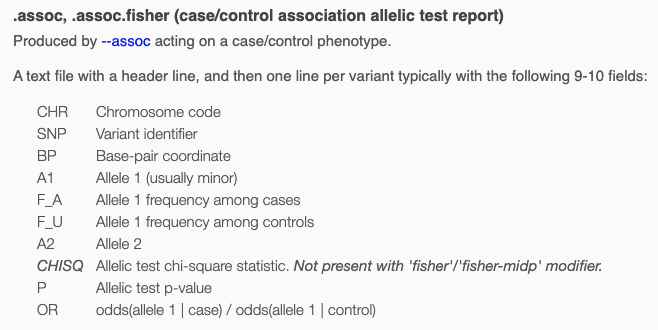  

https://www.cog-genomics.org/plink/1.9/formats#assoc_linear  


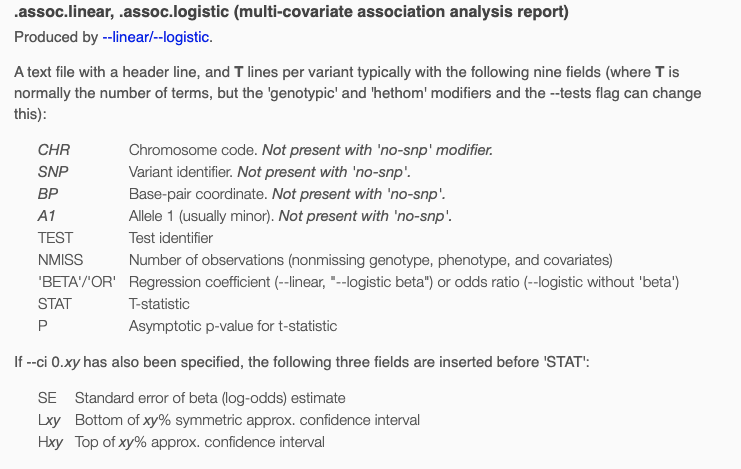  



**add renamed columns:**  
* A1 = Alt Allele (PLINK A1 allele is usually but not always Alt allele)  
* A2 = Ref Allele  
* BP = POS  
* OR = ES = effect size  
* NMISS = .logistic number of observations (nonmissing genotype, phenotype, & covar)

**add columns with "dummy" values:**  
* F_A = .assoc AF affected  
* F_U = .assoc AF unaffected  
* CHISQ = .assoc ChiSquare  
* TEST = .logistic statistical test (set to ADD for additive model)    
* STAT = .logistic t-statistic  


**convert vcf columns to plink columns:**  

* SNP from CHR + BP  
* P from LP (LP = -log10 P) --> 10^-LP  


In [26]:
cols_assoc = ['CHR', 'SNP', 'BP', 'A1', 'F_A', 'F_U', 'A2', 'CHISQ', 'P', 'OR']
cols_logistic = ['CHR', 'SNP', 'BP', 'A1', 'TEST', 'NMISS', 'OR', 'SE', 'STAT', 'P']

In [27]:
# df = vcf_in.copy() 

df = vcf_in2.copy() 

In [28]:
df.columns

Index(['CHROM', 'POS', 'ID', 'REF', 'ALT', 'QUAL', 'FILTER', 'INFO', 'FORMAT',
       'ieu-b-43', 'ES', 'SE', 'LP', 'AF', 'SS', 'NC', 'SNP'],
      dtype='object')

#### 1) add renamed columns:  

* A1 = Alt Allele (PLINK A1 allele is usually but not always Alt allele)  
* A2 = Ref Allele  
* BP = POS  
* OR = ES = effect size  
* NMISS = SS = sample size (approx, not quite the number of observations) | 0 if SS not in .vcf file

In [29]:
df['CHR'] = df['CHROM'].copy()
df['BP'] = df['POS'].copy()
df['A1'] = df['ALT'].copy()
df['A2'] = df['REF'].copy()
df['OR'] = df['ES'].copy()

if 'SS' in df.columns:
    df['NMISS'] = df['SS'].copy()
else:
    df['NMISS'] = 0

df.head(3)
df.dtypes

CHROM      POS          ID REF ALT QUAL FILTER         INFO  \
0      1   768448  rs12562034   G   A    .   PASS  AF=0.105726   
1      1  1005806   rs3934834   C   T    .   PASS  AF=0.148488   
2      1  1018704   rs9442372   A   G    .   PASS  AF=0.565981   

                 FORMAT                                           ieu-b-43  \
0  ES:SE:LP:AF:SS:NC:ID  0.0256677:0.110171:0.0884163:0.105726:3024:515...   
1  ES:SE:LP:AF:SS:NC:ID  0.0459289:0.0955402:0.200177:0.148488:3024:515...   
2  ES:SE:LP:AF:SS:NC:ID  0.110373:0.0694047:0.951558:0.565981:3024:515:...   

   ...        AF    SS   NC         SNP  CHR       BP A1  A2        OR NMISS  
0  ...  0.105726  3024  515  rs12562034    1   768448  A   G  0.025668  3024  
1  ...  0.148488  3024  515   rs3934834    1  1005806  T   C  0.045929  3024  
2  ...  0.565981  3024  515   rs9442372    1  1018704  G   A  0.110373  3024  

[3 rows x 23 columns]

CHROM         int64
POS           int64
ID           object
REF          object
ALT          object
QUAL         object
FILTER       object
INFO         object
FORMAT       object
ieu-b-43     object
ES          float64
SE          float64
LP          float64
AF          float64
SS            int64
NC            int64
SNP          object
CHR           int64
BP            int64
A1           object
A2           object
OR          float64
NMISS         int64
dtype: object

In [30]:
df['CHROM'].unique()
df['CHR'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22])

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22])

#### 2) add columns with "dummy" values:  

* F_A = .assoc AF affected  
* F_U = .assoc AF unaffected  
* CHISQ = .assoc ChiSquare  
* TEST = .logistic statistical test (set to ADD for additive model)  
* STAT = .logistic t-statistic  


In [31]:
df['F_A'] = 0.0 
df['F_U'] = 0.0 
df['CHISQ'] = 0.0 
df['TEST'] = 'ADD' 
df['STAT'] = 0.0 

df.head(3)

CHROM      POS          ID REF ALT QUAL FILTER         INFO  \
0      1   768448  rs12562034   G   A    .   PASS  AF=0.105726   
1      1  1005806   rs3934834   C   T    .   PASS  AF=0.148488   
2      1  1018704   rs9442372   A   G    .   PASS  AF=0.565981   

                 FORMAT                                           ieu-b-43  \
0  ES:SE:LP:AF:SS:NC:ID  0.0256677:0.110171:0.0884163:0.105726:3024:515...   
1  ES:SE:LP:AF:SS:NC:ID  0.0459289:0.0955402:0.200177:0.148488:3024:515...   
2  ES:SE:LP:AF:SS:NC:ID  0.110373:0.0694047:0.951558:0.565981:3024:515:...   

   ...       BP  A1  A2        OR  NMISS  F_A  F_U  CHISQ  TEST STAT  
0  ...   768448   A   G  0.025668   3024  0.0  0.0    0.0   ADD  0.0  
1  ...  1005806   T   C  0.045929   3024  0.0  0.0    0.0   ADD  0.0  
2  ...  1018704   G   A  0.110373   3024  0.0  0.0    0.0   ADD  0.0  

[3 rows x 28 columns]

#### 3) convert vcf columns to plink columns:    

* P from LP (LP = -log10 P) --> 10^-LP  

In [32]:
# df['SNP'] = df['CHROM'].astype(str) + '_' + df['POS'].astype(str) + '_' + df['ID'].astype(str) 

# df.head(3)

In [33]:
df['LP'] = df['LP'].astype(float)

df['P'] = pow(10, -df['LP'])

df.head(3)

CHROM      POS          ID REF ALT QUAL FILTER         INFO  \
0      1   768448  rs12562034   G   A    .   PASS  AF=0.105726   
1      1  1005806   rs3934834   C   T    .   PASS  AF=0.148488   
2      1  1018704   rs9442372   A   G    .   PASS  AF=0.565981   

                 FORMAT                                           ieu-b-43  \
0  ES:SE:LP:AF:SS:NC:ID  0.0256677:0.110171:0.0884163:0.105726:3024:515...   
1  ES:SE:LP:AF:SS:NC:ID  0.0459289:0.0955402:0.200177:0.148488:3024:515...   
2  ES:SE:LP:AF:SS:NC:ID  0.110373:0.0694047:0.951558:0.565981:3024:515:...   

   ...  A1  A2        OR  NMISS  F_A  F_U CHISQ  TEST  STAT       P  
0  ...   A   G  0.025668   3024  0.0  0.0   0.0   ADD   0.0  0.8158  
1  ...   T   C  0.045929   3024  0.0  0.0   0.0   ADD   0.0  0.6307  
2  ...   G   A  0.110373   3024  0.0  0.0   0.0   ADD   0.0  0.1118  

[3 rows x 29 columns]

In [34]:
df[['LP', 'P']].head(10)

LP        P
0  0.088416  0.81580
1  0.200177  0.63070
2  0.951558  0.11180
3  1.546220  0.02843
4  0.336959  0.46030
5  0.681519  0.20820
6  0.964971  0.10840
7  0.317223  0.48170
8  0.060730  0.86950
9  0.269056  0.53820

In [35]:
df[df['P'].isnull()]


Empty DataFrame
Columns: [CHROM, POS, ID, REF, ALT, QUAL, FILTER, INFO, FORMAT, ieu-b-43, ES, SE, LP, AF, SS, NC, SNP, CHR, BP, A1, A2, OR, NMISS, F_A, F_U, CHISQ, TEST, STAT, P]
Index: []

[0 rows x 29 columns]

<br>  

## Extract columns for .assoc + .logistic output files

In [36]:
df_assoc = df[cols_assoc]
df_logistic = df[cols_logistic]

df_assoc.shape
df_logistic.shape
df.shape

(399503, 10)

(399503, 10)

(399503, 29)

In [37]:
df_assoc.head(2)
df_logistic.head(2)

CHR         SNP       BP A1  F_A  F_U A2  CHISQ       P        OR
0    1  rs12562034   768448  A  0.0  0.0  G    0.0  0.8158  0.025668
1    1   rs3934834  1005806  T  0.0  0.0  C    0.0  0.6307  0.045929

CHR         SNP       BP A1 TEST  NMISS        OR        SE  STAT       P
0    1  rs12562034   768448  A  ADD   3024  0.025668  0.110171   0.0  0.8158
1    1   rs3934834  1005806  T  ADD   3024  0.045929  0.095540   0.0  0.6307

### write output files

In [38]:
df_assoc.to_csv(assoc_out, header=True, index=False, sep=' ')
df_logistic.to_csv(logistic_out, header=True, index=False, sep=' ')

In [39]:
df.to_csv(vcf_out, header=True, index=False, sep='\t')